In [1]:
# General dependencies
import os, shutil
from os.path import join
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from glob import glob

In [2]:
# LCBD dependencies
# add relative path to our toolbox
import sys
sys.path.append('../../../..') # path to preprocessing from here

from LCBDtools.scripts import argParser
from LCBDtools.src import Plots
from LCBDtools.src import Statistics
from LCBDtools.src import TimeSeries
from LCBDtools.Stimuli.Flanker.Flanker import TaskReader

In [3]:
# Some configuration variables
dataDir = "/data/perlman/moochie/study_data/P-CAT/task_data"
participant_num_len = 4 # default length of participant numbers
task = "Flanker"

In [18]:
# from data tracker June 3rd 2022, list of subjects with v3 Flanker completed
in_subs = [
    "1115",
    "1116",
    "1110",
    "1114",
    "1119",
    "1121",
    "1122",
    "1126",
    "1125",
    "1127",
    "1128",
    "1129",
    "1134",
    "1130",
    "1131",
    "1137",
    "1124",
    "1133",
    "1138",
    "1144",
    "1143",
    "1141",
    "1145",
    "1149",
    "1154",
    "1155",
    "1142",
    "1148",
    "1156"
]

In [19]:
fnames = [fname for fname in glob(join(dataDir, '*', '*_'+task, '*.csv')) if \
    os.path.basename(fname)[:participant_num_len] in in_subs]

In [20]:
d_dataset = {}

for fname in fnames:
    try:
        flanker_series = TaskReader(fname).flankerSeries
        subject = os.path.basename(fname)[:participant_num_len]
        d_dataset[subject] = flanker_series
    except:
        print("Error encountered @ subject:", os.path.basename(fname)[:participant_num_len])  

Error encountered @ subject: 1144
Error encountered @ subject: 1116
Error encountered @ subject: 1154
Error encountered @ subject: 1154
Error encountered @ subject: 1121


In [7]:
# these subjects have missing data maybe? they have version 3 but aren't here. 
# maybe they don't actually have real flanker?
print([sub for sub in in_subs if sub not in list(d_dataset.keys())])

['1116', '1119', '1121', '1128', '1131', '1137', '1133', '1138', '1144', '1151']


In [8]:
# these subjects have actual flanker data loaded in:
print(list(d_dataset.keys()))

['1143', '1134', '1115', '1127', '1124', '1129', '1130', '1145', '1113', '1114', '1126', '1122', '1125']


In [9]:
d_dataset['1143'][0].meta

{'trial_n': 1,
 'block': 1,
 'corr_answer': 'right',
 'stim_file': 'stimuli/trial_block1_D_IR.png',
 'directional': True,
 'congruent': False,
 'stim_start_time': 148.88142539999538,
 'stim_stop_time': 149.88684779999312,
 'response': 'right',
 'response_time': 1.1343522999959532,
 'fixation_start_time': 147.40243559999362,
 'fixation_stop_time': 148.91558899999652}

In [10]:
dataset = []

for sub in d_dataset.keys():
    for flank in d_dataset[sub]:
        dataset.append(flank)

In [11]:
# Plots.plot_outcome_hist(
#     [flank.meta['response_time'] for flank in dataset],
#     [flank.meta['congruent'] for flank in dataset],
#     xlabel="Response Time",
#     title="Congruency (Incongruent=0, Congurent=1)",
#     n_bins=10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


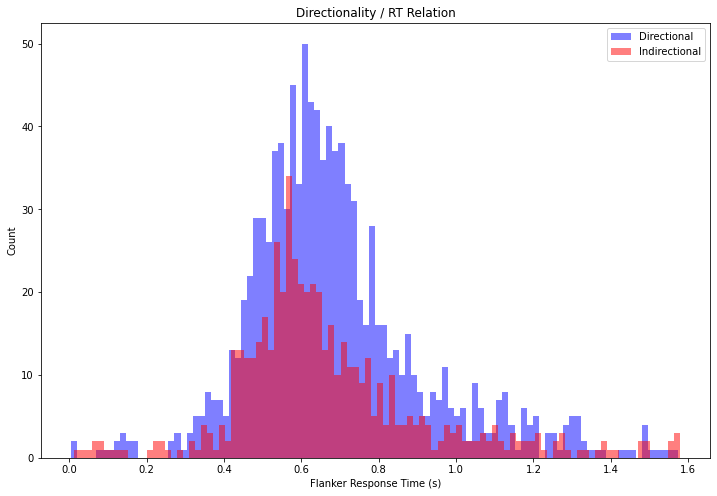

In [12]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['directional'] is True],
    bins=100,
    alpha=0.5,
    label="Directional",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['directional'] is False],
    bins=100,
    alpha=0.5,
    label="Indirectional",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Directionality / RT Relation")
plt.legend(loc='upper right')

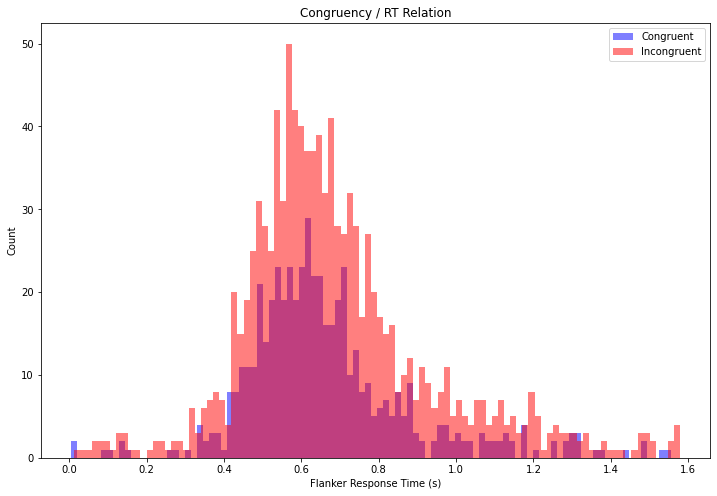

In [13]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['congruent'] is True],
    bins=100,
    alpha=0.5,
    label="Congruent",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.meta['congruent'] is False],
    bins=100,
    alpha=0.5,
    label="Incongruent",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Congruency / RT Relation")
plt.legend(loc='upper right')

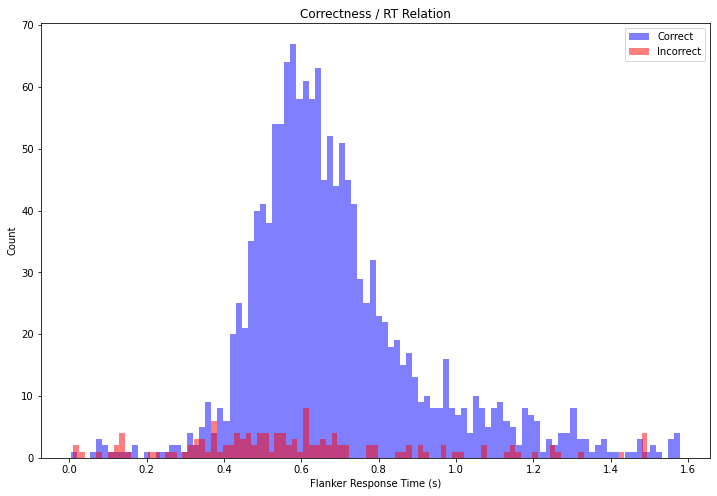

In [14]:
plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.eval() is True],
    bins=100,
    alpha=0.5,
    label="Correct",
    color='blue')

plt.hist(
    [flank.meta['response_time'] for flank in dataset if\
        flank.eval() is False],
    bins=100,
    alpha=0.5,
    label="Incorrect",
    color='red')

plt.xlabel("Flanker Response Time (s)")
plt.ylabel("Count")
plt.title("Correctness / RT Relation")
plt.legend(loc='upper right')

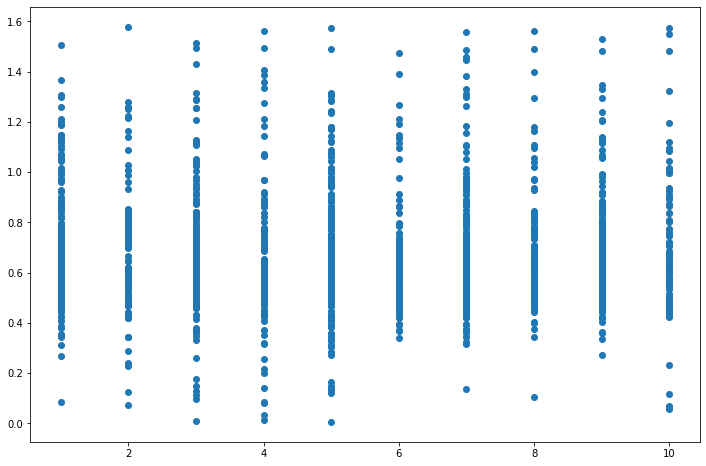

In [15]:
plt.scatter(
    [flank.meta['block'] for flank in dataset],
    [flank.meta['response_time'] for flank in dataset]
)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c5979f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c5979f810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c59796e90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8c5979fed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c597ad250>,
 'means': []}

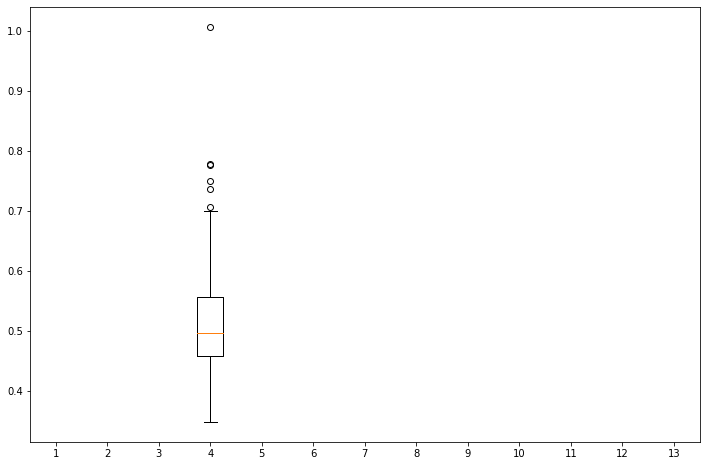

In [16]:
fig, ax = plt.subplots()

data = [
    [flank.meta['response_time'] for flank in d_dataset[sub]] for sub in d_dataset.keys()
]

ax.boxplot(data)

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8c59627910>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8c59698250>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8c595fc490>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8c595fc450>}

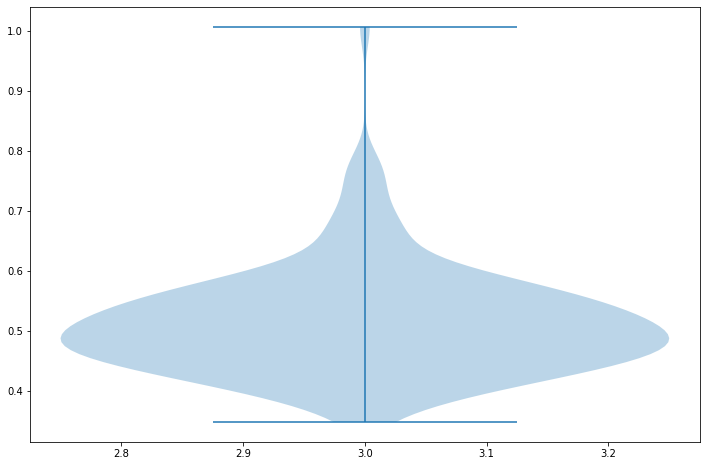

In [17]:

plt.violinplot(
    [[flank.meta['response_time'] for flank in d_dataset[sub]] for sub in d_dataset.keys()],
    positions=[i for i, sub in enumerate(d_dataset.keys())]
)